In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

Возьмём датасет с цветками iris’а

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Оставим два признака - sepal_length и sepal_width и целевую переменную - target

In [3]:
data = data.drop(['petal length (cm)', 'petal width (cm)'], axis=1)
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Разделим данные на выборку для обучения и тестирования

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size = 0.4)

Постройм модель LDA

In [5]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# обучаем данные
lda.fit(X_train, y_train)

# делаем прогноз на тестовой выборке
lda.predict(X_test)

# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.8166666666666667

Визуализируем предсказания для тестовой выборки и центры классов

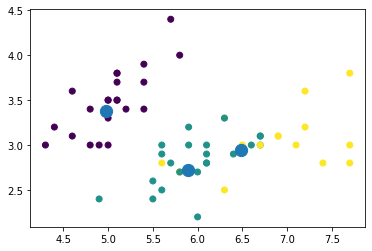

In [6]:
# scatter plot
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c = y_test)

# центроиды
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], s = 150, marker = 'o')

plt.show()

Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [7]:
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

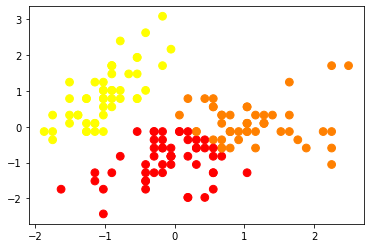

In [8]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data)

from sklearn.cluster import KMeans

# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)

# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

plt.show()

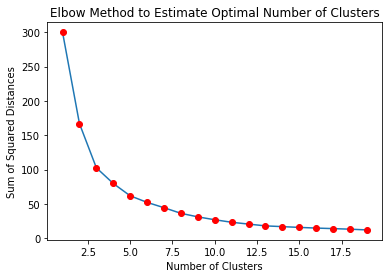

In [9]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method to Estimate Optimal Number of Clusters')
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')
plt.show()

При количестве кластеров больше трёх не происходит значительного уменьшения среднего суммарного квадратичного отклонения точек каждого кластера от соответствующих центров.